Nesta atividade, você irá implementar duas coisas:

 1 - Um jogador que faz jogadas ao acaso, todas as jogadas precisam ser VÁLIDAS
 FEITO
 
 2 - Um wrapper para o player humano (exatamente igual ao que o professor fez duas vezes em sala de aula, uma para breakthrough e outra para o jogo da velha).
 
 3 - Uma função game que permite alternar entre o jogador humano e o seu jogador ao acaso, de modo que o professor possa avaliar o seu trabalho jogando o seu jogo.

Note que o wrapper deve invocar o player humano para fazer uma jogada. Para tanto, informe ao player humano as jogadas válidas e as posições das peças no tabuleiro. Esse item também está na rubrica




### **Jogo dos dedos**

### **Tabuleiro**
O jogo escolhido pelo grupo não possui tabuleiro então pensaremos em uma forma de adaptar pra usá-lo, ele será de tamanho fixo para não mudar a lógica de jogo.

O tabuleiro será dividido em quatro partes, duas de cada lado, e cada parte representando uma mão dos jogadores. E no lugar dos dedos serão utilizados peões no estilo das peças do xadrez.

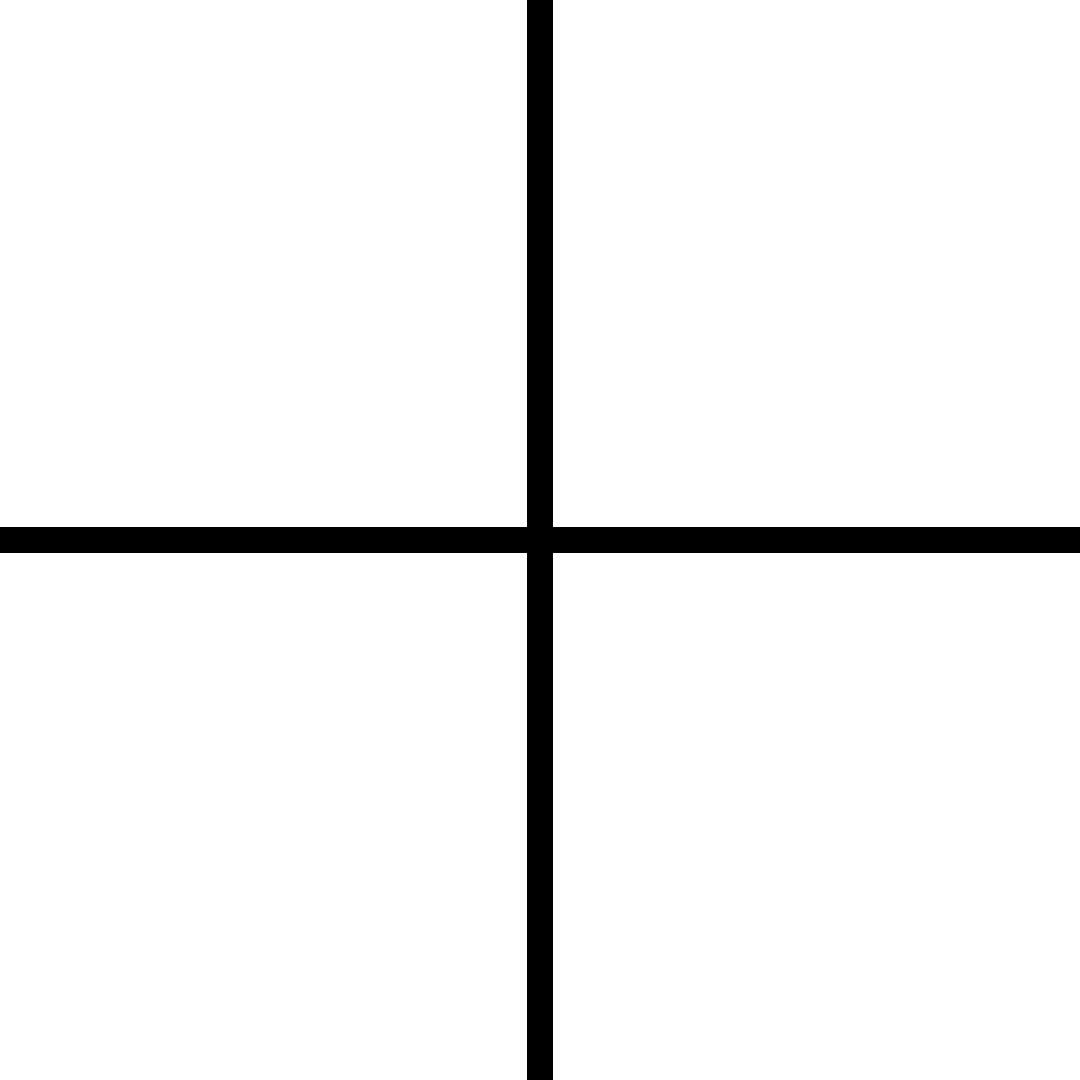

In [ ]:
## Tabuleiro vazio

tab = [1,1, 1,1]

### **Condições de Vitória**

O jogo termina quando um dos jogadores fica com as duas maõs mortas e outro consequentemente com ao menos uma mão ainda viva.

Para vencer uma partida um dos jogadores deve perder as duas casas do tabuleiro, isso acontece quando a soma de peões na casa atinge 5:
* **5,5 -> Jogador 1**
* **5,3 -> Jogador 2**

Nesse caso, o jogador 2 vence, pois o jogador 1 perdeu ambas as casas e o seu adversário ainda possuí ao menos uma.

* **5,4 -> Jogador 1**
* **5,5 -> Jogador 2**

Já nesse segundo caso ocorre exatamente o contrário.

A seguir teremos a função winner que define qual jogador venceu ou se houve empate:



In [ ]:
## Função winner
## Código que devolve o jogador vencedor!

def winner(tab) :
  
  soma1 = tab[0] + tab[1]
  soma2 = tab[2] + tab[3]

  if soma1 == 10:
      print('FIM DO JOGO')
      print(f'O jogador 2 venceu!!!')
                    
  if soma2 == 10:
      print('FIM DO JOGO')
      print(f'O jogador 1 venceu!!!')






### **Movimentos Possíveis**

Uma pessoa será escolhida para jogar primeiro, os jogadores revezarão as jogadas. Em cada vez, um jogador usará um peão para somar em um dos espaços do do tabuleiro (mãos) do adversário.

Soma em uma das "mãos" (casa) do seu oponente com uma das suas. Se você somar com um peão, seu adversário vai adicionar um peão aos peões que já existem.Por exemplo, você soma na casa do seu oponente. Você tem um peão e ele tem um. Ele soma os peões e fica com dois peões na casa do tabuleiro. Na próxima jogada, seu adversário usa a casa com os dois peões para somar na sua casa com um. Agora você terá três peões, porque seu peão somado com os dois é igual a três peões. Só a casa de somar tem o poder de mudar a casa do seu oponente.

**Divisão:** quando for sua vez, você pode somar suas duas casas do tabuleiro uma na outra para redistribuir o número de peões. Por exemplo, se você tem uma casa com três peões e a outra com apenas um peão, você pode dividir e ficar com dois peões em cada casa.

O **objetivo** é continuar adicionando peões à casa do seu adversário somando nela. Quando a "mão" de alguém chega em cinco peões estendidos, aquela casa é considerada "morta" e não pode mais jogar.

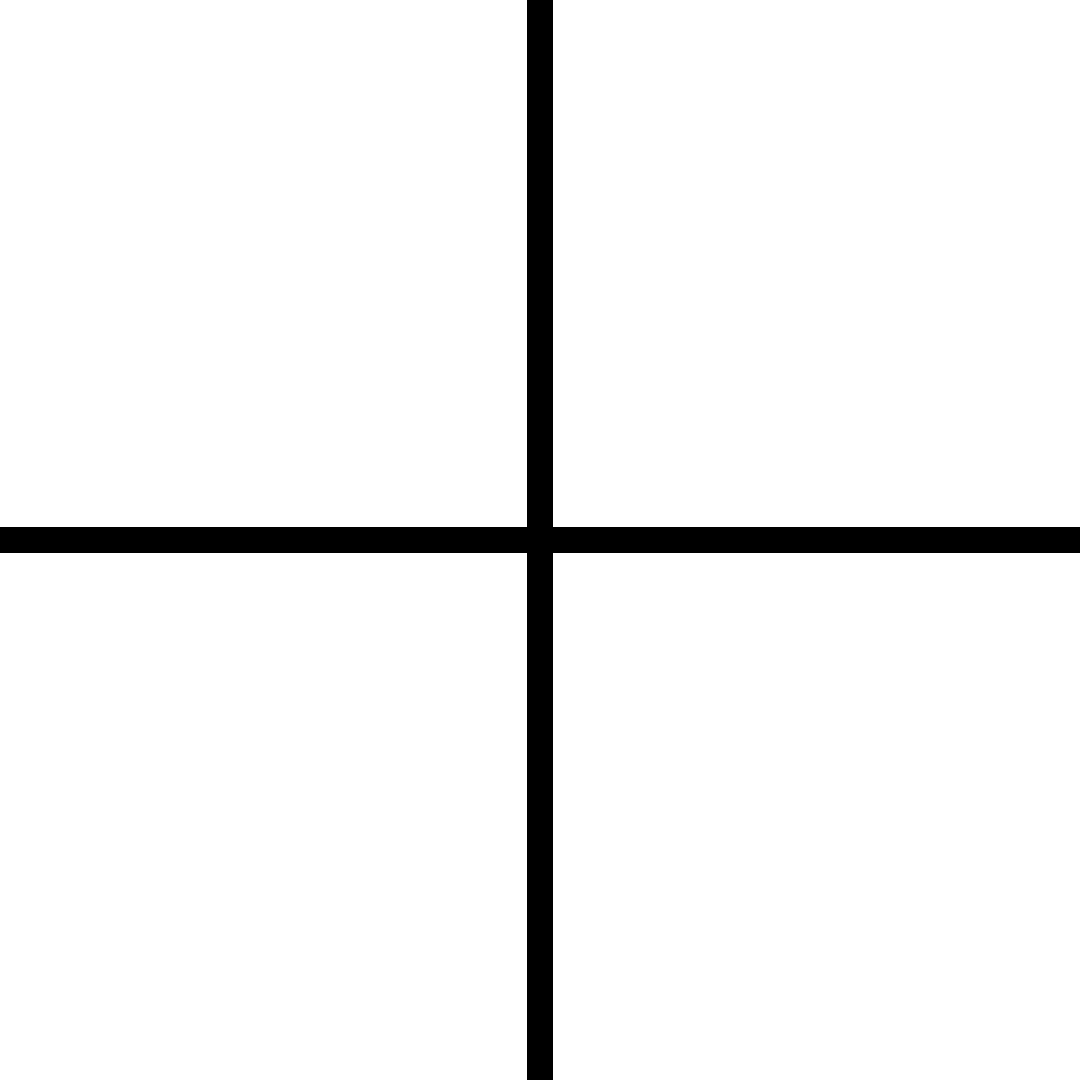

In [ ]:
def divisao(tab) :
              divide = []
              for i in range(len(tab)) :
                      if tab[i] % 2 == 0 and tab[i] + tab[i+1] <=4:
                          divide.append((i)(divide[i] // 2))
                          return divide

### **Efetuando jogadas ao acaso**

O bot precisa ter conhecimento das jogadas disponíveis e quais "peças" movimentar, após isso escolherá uma jogada ao acaso


### **Função Jogador**

Essa função representa as jogadas do jogador.

In [ ]:
def jogador(tab) :
  player = int(input('Escolha mao 0 ou 1 para usar esta rodada'))
  pc = int(input('Escolha mao 2 ou 3 para somar esta rodada'))
  if tab[2] or tab[3] < 5 :
        tab[pc] = tab[pc] + tab[player] 
  else :
        print('mao cheia escolha outra')

### **Função Bot**

Essa função representa as jogadas do bot.

In [ ]:
def bot(tab) :
  player = randint(0,1)
  pc = randint(2,3)
  if tab[0] or tab[1] < 5 :
        tab[player] = tab[player] + tab[pc] 

### **Game** 
Essa função deverá alternar as jogadas entre bot e humano, contar os turnos e salvar as jogadas em um histórico


In [ ]:
## Função que define a partida 
def game(tab) :      
  player = 0
  count = 1
  while (soma1 or soma2 < 10) : 
      if player == 0 :          
          jogador(tab)
          print(tab)
          player = 1
      elif player == 1 :          
          player = 0
          bot(tab)
          print(tab)
          print(f'fim da rodada {count}')
          count = count + 1
          winner(tab)


In [ ]:
game(tab)

O código acima foi testado em outrs IDEs e rodou tranquilamente, tivemos problemas apenas com o colab e não conseguimos resolver.

### **Interface Gráfica**

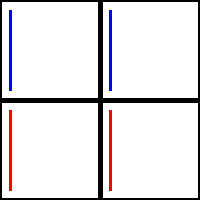

In [ ]:
## Bibliotecas para desenhar tabuleiro
from PIL import Image, ImageDraw

## Quadrado 200x200
board = Image.new('RGB', (200, 200),  "white") ##sugestao de cor: #78866b

## Canvas para desenhar
draw  = ImageDraw.Draw(board)

## Linha horizontal
draw.line( (0, 100, 200, 100), fill = "black", width = 5 ) 
 
## Linha vertical
draw.line( (100, 0, 100, 200), fill = "black", width = 5 ) 

## bordas do tabuleiro
draw.line( (0, 0, 0, 200), fill = "black", width = 2 )
draw.line( (200, 0, 0, 0), fill = "black", width = 3 )
draw.line( (200, 0, 200, 200), fill = "black", width = 6)
draw.line( (0, 200, 200, 200), fill = "black", width = 6)

## peças iniciais
draw.line( (10,10, 10,90), fill = "blue", width = 3 )
draw.line( (110,10, 110,90), fill = "blue", width = 3 )
draw.line( (10,110, 10,190), fill = "red", width = 3)
draw.line( (110,110, 110,190), fill = "red", width = 3)

display(board)